## Importing Libraries and viewing DataFrame

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [287]:
df = pd.read_csv('SyriaTel_customer_data.csv')
print('Dataframe shape is:',df.shape)
df.head()

Dataframe shape is: (3333, 21)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

### Who are our customers?

We do business in all 50 States, these are the 5 states with the __most customers__

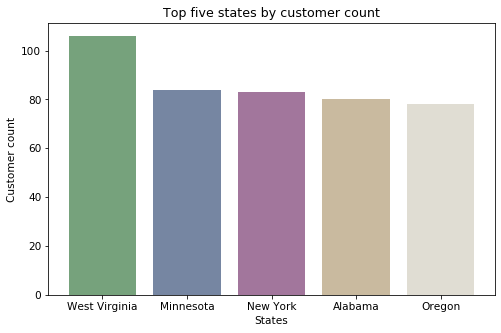

In [313]:
plt.figure(figsize=(8,5));
plt.title('Top five states by customer count');
plt.ylabel('Customer count');
plt.xlabel('States')
tp_fv_st = df['state'].value_counts()[:5]
states = ['West Virginia', 'Minnesota', 'New York', 'Alabama', 'Oregon']
colors1 = ['#76a27c', '#7686a2', '#a2769c', '#c9ba9f', '#e0ddd3']
plt.bar(states,tp_fv_st,color=colors1);
plt.savefig('graphs_and_images/top_five_states_by_customer.png')

I've added the day, evening, and night calls to get the total amount of calls. This DataFrame is the top five states by average calls per customer

In [301]:
total_call_per_day = df['total day calls'] + df['total eve calls'] + df['total night calls']
calls_counts = pd.concat([df['state'],total_call_per_day],axis=1)
states_counts = df['state'].value_counts().reset_index().rename(columns={'index':'state','state':'count'})   
call_by_state = calls_counts.groupby('state')[0].sum().reset_index().rename(columns={0:'calls'})
calls_per_st = pd.merge(states_counts,call_by_state)
calls_per_st['calls_per_cust'] = calls_per_st['calls']/calls_per_st['count']
calls_per_st = calls_per_st.sort_values(by='calls_per_cust',ascending=False)
calls_per_st[:5]

,state,count,calls,calls_per_cust
42,GA,54,16868,312.370370
28,FL,63,19546,310.253968
32,ND,62,19089,307.887097
19,NC,68,20892,307.235294
15,IN,71,21792,306.929577


In [303]:
state_count = df['state'].value_counts().reset_index().rename(columns={'index':'state','state':'count'})
state_churn = df.groupby('state')['churn'].sum().reset_index()
states_ct_ch = pd.merge(state_count,state_churn,how='left')
states_ct_ch['percent'] =  round((states_ct_ch['churn'] / states_ct_ch['count']) *100,2)
states_ct_ch = states_ct_ch.sort_values(by='percent',ascending=False).reset_index(drop=True)
print('The average churn rate is:',round(states_ct_ch['percent'].mean(),2),'percent')

The average churn rate is: 14.49 percent


The states with the most customers who leave us are:

These are the five states with the highest churn rate


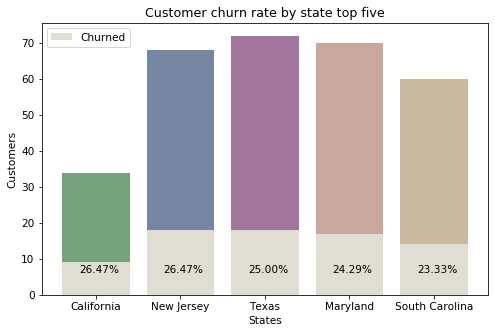

In [315]:
print('These are the five states with the highest churn rate')
states_ct_ch_st = ['California','New Jersey','Texas','Maryland','South Carolina']
colors3 = ['#76a27c', '#7686a2', '#a2769c', '#c9a79f', '#c9ba9f']

plt.figure(figsize=(8,5));
plt.title('Customer churn rate by state top five')
plt.ylabel('Customers');
plt.xlabel('States');
plt.bar(states_ct_ch_st,states_ct_ch['count'][:5],color=colors3);
plt.bar(states_ct_ch_st,states_ct_ch['churn'][:5],color='#e0ddd3',label='Churned');
plt.legend(loc=2)
plt.text(-.2,6,'{:.2%}'.format(states_ct_ch['percent'][0]/100))
plt.text(.8,6,'{:.2%}'.format(states_ct_ch['percent'][1]/100))
plt.text(1.8,6,'{:.2%}'.format(states_ct_ch['percent'][2]/100))
plt.text(2.8,6,'{:.2%}'.format(states_ct_ch['percent'][3]/100))
plt.text(3.8,6,'{:.2%}'.format(states_ct_ch['percent'][4]/100))
# plt.show()
plt.savefig('graphs_and_images/top_five_states_by_churnRate.png')

We can see that in our dataset ~15% of customers leave to do business elsewhere

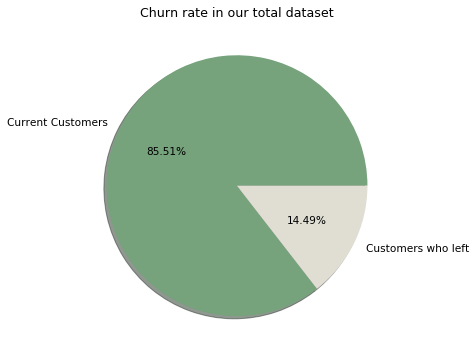

In [316]:
plt.figure(figsize=(8,6));
plt.title('Churn rate in our total dataset');
plt.pie(df['churn'].value_counts(normalize=True),
        colors=['#76a27c','#e0ddd3'],
        labels=['Current Customers','Customers who left'],
        shadow=True,
        autopct='%1.2f%%');
# plt.show()
plt.savefig('graphs_and_images/pie_chart_of_churn_rate.png')

---

## Checking Feature importance

In this section we will go over some of the fundamental features of this dataset, and check for statistically significant changes in customer churn rate. Our goal is simple, keep as many customers as possible. Will we learn what might lead a customer to leave us? Let's find out... <br> Features we will be investigating:
* Account length
* International plan
* Voice mail plan 
* Total charges (a new feature after aggregating the different charges)
* Customer service calls
<br> 


### Account Length

The feature *'__account length__'* indicates how long we've had this customer (in days). <br> I got to wondering perhaps we have a higher churn rate on newer customers - which would mean we have a retention problem. I will test the distributions of account length for customers who left and for those who didn't. Let's see what we find..

In [192]:
from scipy.stats import ks_2samp
from statsmodels.stats import proportion

In [183]:
ks_2samp(df[df['churn'] == True]['account length'],df[df['churn'] == False]['account length'])

Ks_2sampResult(statistic=0.03894300969815844, pvalue=0.5432261417245803)

*change colors*

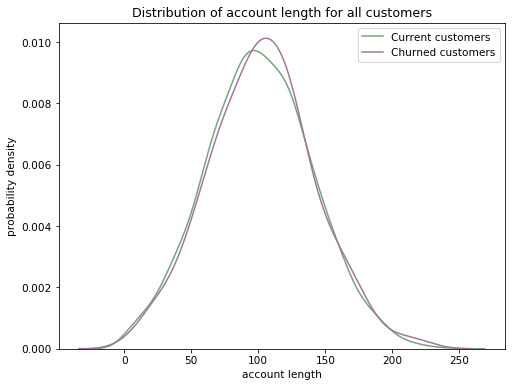

In [318]:
plt.figure(figsize=(8,6));
plt.title('Distribution of account length for all customers');
plt.xlabel('Account length');
plt.ylabel('probability density');
sns.distplot(df[df['churn'] == False]['account length'],hist=False,label='Current customers',color='#76a27c');
sns.distplot(df[df['churn'] == True]['account length'],hist=False,label='Churned customers',color='#a2769c');
plt.legend()
plt.show()
# plt.savefig('graphs_and_images/pdf_account_length.png')

After testing the distributions of account length for those who churned and for those who didn't, we found no real difference with a P value of .54. The visual clearly shows identical distributions. Turns out a customer might leave us irrespective of how long they've been with us.

### International Plan

Moving along we have a feature __*'international plan'*__: with values of 'yes' or 'no' answering does this customer have an international plan.<br>
Is the proportion of churned customers the same for customers who have a international plan versus those who don't? Let's find out...

In [164]:
from statsmodels.stats.weightstats import ttest_ind
print('We reject the null with a p value of:',ttest_ind(df[df['international plan']=='no']['churn'],df[df['international plan']=='yes']['churn'])[1])
pd.DataFrame(df.groupby('international plan')['churn'].value_counts(normalize=True)).rename(columns={'churn':'Churn rate'})

We reject the null with a p value of: 1.4336058008648218e-52


Churn rate
international plan churn            
no                 False    0.885050
                   True     0.114950
yes                False    0.575851
                   True     0.424149

We've just tested these two proportions against each other and retrieved a P value of _1.4336058008648218e-52_ indicating that we are looking at two different populations. We must investigate further why customers enrolled in our international plan have a higher rate of leaving us. Here is a visual:

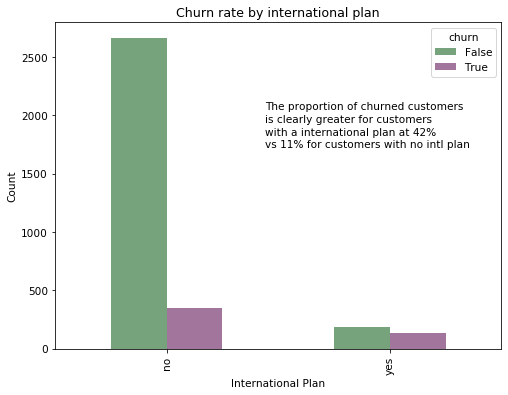

In [320]:
ax = df.groupby('international plan')['churn'].value_counts().unstack().plot(kind='bar',figsize=(8,6),color=['#76a27c','#a2769c']);
ax.set_title('Churn rate by international plan');
ax.set_ylabel('Count');
ax.set_xlabel('International Plan');
fig = ax.get_figure()
fig.text(.49,.68,'The proportion of churned customers');
fig.text(.49,.65,'is clearly greater for customers');
fig.text(.49,.62,'with a international plan at 42%');
fig.text(.49,.59,'vs 11% for customers with no intl plan');
plt.rcParams.update({'font.size': 10.5})
fig.savefig("graphs_and_images/churn_by_intl_plan.png")

>Although we are interested in knowing why customers with a international plan leave us at a higher rate, it is important to point out that most of our customers do not have an international plan making this a non "international" problem. 😉

In [168]:
print('{:.2%} of our customers do not use international plans'.format(df['international plan'].value_counts(normalize=True)[0]))

90.31% of our customers do not use international plans


### Voicemail Plan

The feature __*voicemail plan*__ has values 'yes' or 'no' answering does this customer have a voicemail plan.<br>
Is the proportion of churned customers the same for customers who use have use voicemail versus those who don't? Let's find out...

In [176]:
print('We reject the null with a p value of:',ttest_ind(df[df['voice mail plan']=='no']['churn'],df[df['voice mail plan']=='yes']['churn'])[1])
pd.DataFrame(df.groupby('voice mail plan')['churn'].value_counts(normalize=True)).rename(columns={'churn':'Churn rate'})

We reject the null with a p value of: 3.4110371159458437e-09


Churn rate
voice mail plan churn            
no              False    0.832849
                True     0.167151
yes             False    0.913232
                True     0.086768

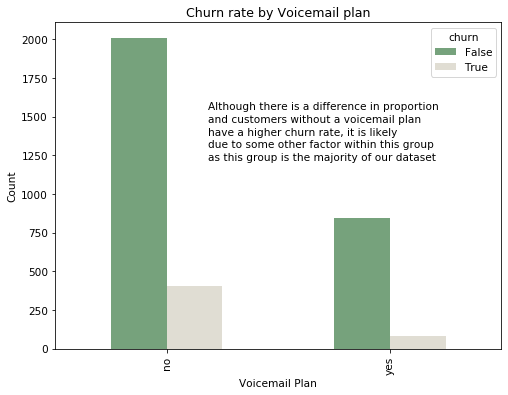

In [182]:
ax = df.groupby('voice mail plan')['churn'].value_counts().unstack().plot(kind='bar',figsize=(8,6),color=['#76a27c','#e0ddd3']);
ax.set_title('Churn rate by Voicemail plan');
ax.set_ylabel('Count');
ax.set_xlabel('Voicemail Plan');
fig = ax.get_figure()
fig.text(.39,.68,'Although there is a difference in proportion');
fig.text(.39,.65,'and customers without a voicemail plan');
fig.text(.39,.62,'have a higher churn rate, it is likely ');
fig.text(.39,.59,'due to some other factor within this group');
fig.text(.39,.56,'as this group is the majority of our dataset');
plt.rcParams.update({'font.size': 10.5})
# fig.savefig("graphs_and_images/churn_by_vm_plan.png")

In [184]:
'{:.2%} of our customers do not use voicemail'.format(df['voice mail plan'].value_counts(normalize=True)[0])

'72.34% of our customers do not use voicemail'

### Total Charges

In this dataset we were given Total charges for day, evening, night, and international. I've aggregated these into a new feature called __*'total_charges'*__

In [201]:
total_charges = df['total day charge'] + df['total eve charge'] + df['total night charge']  + df['total intl charge']
total_charges_df = pd.concat([total_charge_per_day,df['churn']],axis=1).rename(columns={0:'total_charges'})
total_charges_df.head(2)

,total_charges,churn
0,75.56,False
1,59.24,False


In [202]:
total_charges_df.describe()

,total_charges
count,3333.000000
mean,59.449754
std,10.502261
min,22.930000
25%,52.380000
50%,59.470000
75%,66.480000
max,96.150000


Now that we have total charges for each customer lets investigate if our fees are leading customers away.

In [203]:
ks_2samp(total_charges_df[total_charges_df['churn'] == True]['total_charges'],total_charges_df[total_charges_df['churn'] == False]['total_charges'])

Ks_2sampResult(statistic=0.4047117794486216, pvalue=3.4963581973148036e-59)

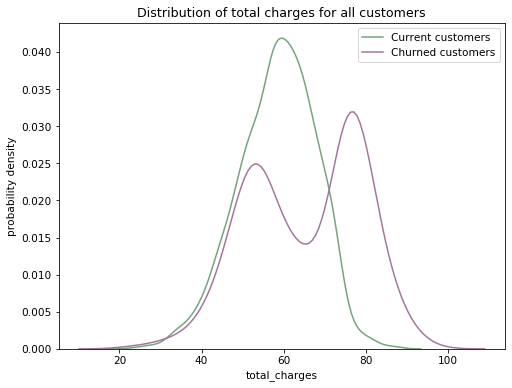

In [322]:
plt.figure(figsize=(8,6));
plt.title('Distribution of total charges for all customers');
plt.xlabel('Total charges');
plt.ylabel('probability density');
sns.distplot(total_charges_df[total_charges_df['churn'] == False]['total_charges'],hist=False,label='Current customers',color='#76a27c');
sns.distplot(total_charges_df[total_charges_df['churn'] == True]['total_charges'],hist=False,label='Churned customers',color='#a2769c');
plt.legend()
# plt.show()
plt.savefig('graphs_and_images/pdf_total_charges.png')

>From the distribution plot above it is difficult to say that higher fees is the main influence on a customer leaving, as we can see many customers leave and had fairly low fees. We can however see that if a customer is paying above $80 they are far more likely to leave.

Since I aggregated all the types of charges I wanted to see which type of charge had the biggest influence. Turns out to be '__*Total day charge*__'

1.6031041711332445e-36
2.3640999002316754e-05
0.17503588243872048
0.0004174823491402968


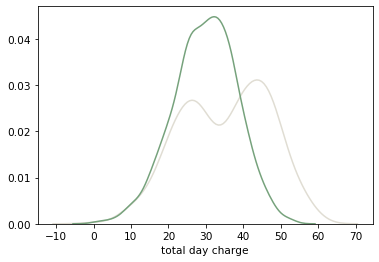

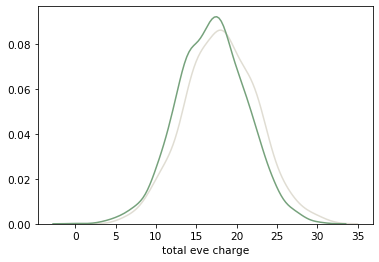

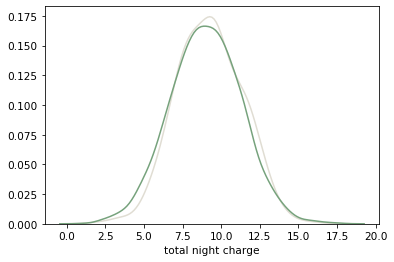

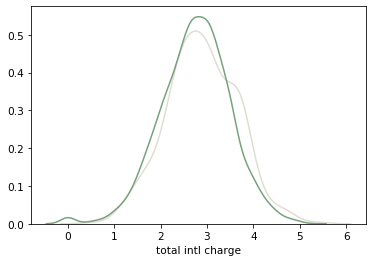

In [278]:
charge_types = ['total day charge','total eve charge','total night charge','total intl charge']
for charge in charge_types:
    plt.figure()
    print(ks_2samp(df[df['churn']][charge],df[~df['churn']][charge])[1])
    sns.distplot(df[df['churn']][charge],hist=False,color='#e0ddd3')
    sns.distplot(df[~df['churn']][charge],hist=False,color='#76a27c')

### Customer Service Calls

The feature __*'customer service calls'*__ is a continuous value representing the amount of calls this customer made to our customer service. <br>We can assume that unhappy customers would call more often but are we taking care of there issues or are do they decide to leave? Let's find out..

In [242]:
ks_2samp(df[df['churn']]['customer service calls'],df[~df['churn']]['customer service calls'])

Ks_2sampResult(statistic=0.24045112781954886, pvalue=6.661338147750939e-16)

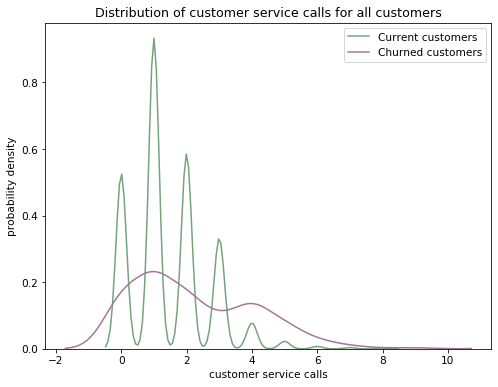

In [323]:
plt.figure(figsize=(8,6));
plt.title('Distribution of customer service calls for all customers');
plt.xlabel('Amount of customer service calls');
plt.ylabel('probability density');
sns.distplot(df[df['churn'] == False]['customer service calls'],hist=False,label='Current customers',color='#76a27c');
sns.distplot(df[df['churn'] == True]['customer service calls'],hist=False,label='Churned customers',color='#a2769c');
plt.legend()
# plt.show()
plt.savefig('graphs_and_images/pdf_customer_service_calls.png')

Above we can see that we have a significantly different customer service calls distribution for the group of customers who leave us. Let's investigate this further 

In [330]:
# plt.figure(figsize=(8,6));
# plt.title('Proportion histogram of customers and number of customer service calls');
# plt.ylabel('Percentage');
# plt.xlabel('Number of calls to Customer service')
# plt.hist(df[~df['churn']]['customer service calls'],histtype='step',weights=np.ones(len(df[~df['churn']])) / len(df[~df['churn']]),bins=sorted(df['customer service calls'].unique()),color='#76a27c',label='Current customers');
# plt.hist(df[df['churn']]['customer service calls'],histtype='step',weights=np.ones(len(df[df['churn']])) / len(df[df['churn']]),color='#a2769c',label='Churned customers');
# plt.legend();
# # plt.show()
# plt.savefig('graphs_and_images/step_hist_cs_calls_prop.png')

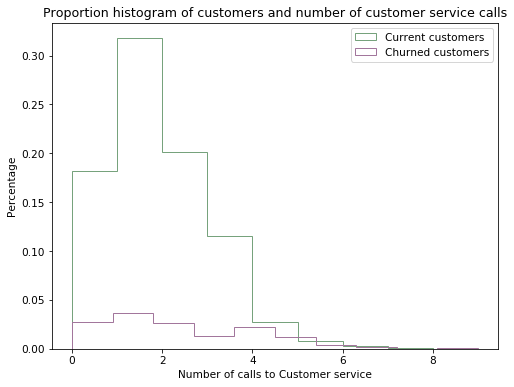

In [332]:
plt.figure(figsize=(8,6));
plt.title('Proportion histogram of customers and number of customer service calls');
plt.ylabel('Percentage');
plt.xlabel('Number of calls to Customer service')
plt.hist(df[~df['churn']]['customer service calls'],histtype='step',weights=np.ones(len(df[~df['churn']])) / len(df['account length']),bins=sorted(df['customer service calls'].unique()),color='#76a27c',label='Current customers');
plt.hist(df[df['churn']]['customer service calls'],histtype='step',weights=np.ones(len(df[df['churn']])) / len(df['account length']),color='#a2769c',label='Churned customers');
plt.legend();
plt.show()
# plt.savefig('graphs_and_images/step_hist_cs_calls_prop.png')

>In this figure we can see that for customers who make more than 4 calls to customer service the proportion of customers who leave surpass the proportion of those who stay, with 61% who leave.

In [281]:
df[df['customer service calls']>4]['churn'].value_counts(normalize=True)

True     0.613861
False    0.386139
Name: churn, dtype: float64

---

## Functions

In [284]:
def preprocess(df):
#     removing feature phone number - customers phone number has no impact on churn
    df.drop(columns=['phone number'],inplace=True)
    
#     converting the categorical columns into values
    df['international plan']  = df['international plan'].astype('category').cat.codes
    df['voice mail plan']     = df['voice mail plan'].astype('category').cat.codes
    df['state']               = df['state'].astype('category').cat.codes
    
    
#     creating new dataframe with new features
    total_charges = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
    total_calls = df['total day calls'] + df['total eve calls'] + df['total night calls']
    new_df = pd.concat([total_calls,total_charges],axis=1).rename(columns={0:'total_calls',1:'total_charges'})
    
    
#     save the modified dataframe as preprocessed
    df.to_csv('preprocessed_cutomer_data.csv')
#     save the new dataframe 
    new_df.to_csv('new_features.csv')
    
    

In [285]:
preprocess(df)

See you in the 'Modeling' notebook!